# Getting an overall picture of plans

In this notebook we will do some exploration of the information we cleaned in previous notebooks. In particular we will do the following:

1. Get a sense of how premiums are distributed.
2. Try to visualize the most widely-available plans by count.

We use the following libraries in this notebook:

1. `pickle` - The library I used to unpack my dataframes where my information is stored.
3. `matplotlib` - for plotting.
4. `pandas` - A library for manipulating data in a tabular format.

In [53]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with open ('../pickles/df.pkl', 'rb') as pkl:
    df = pickle.load(pkl)
df.StateCode = df.StateCode.astype('object')

In [25]:
with open ('../pickles/no_dupes.pkl', 'rb') as pkl:
    no_dupes = pickle.load(pkl)

## Distribution of monthly premiums

How are premiums distributed and what conclusions can we derive from visually inspecting premiums?

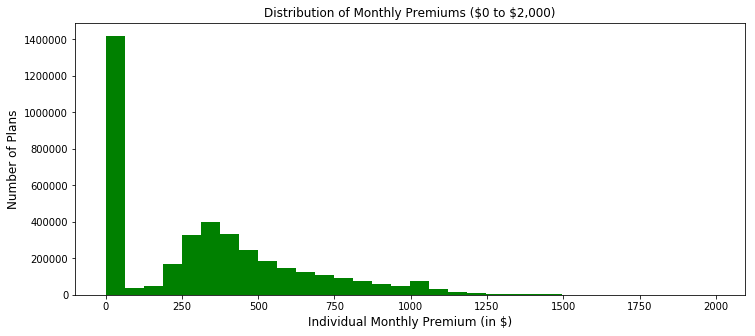

In [145]:
plt.figure(figsize=(12,5));
plt.hist(df[df['IndividualRate'] <= 2000]['IndividualRate'], bins=32, color='g');
plt.title('Distribution of Monthly Premiums (\$0 to \$2,000)', fontsize=12)
plt.xlabel('Individual Monthly Premium (in $)', fontsize=12);
plt.ylabel('Number of Plans', fontsize=12);

The rates appear to be normally distributed, except for a) a right skew and b) a large number of sub-\$100 plans. Let's zoom into the sub-\$100 plans:

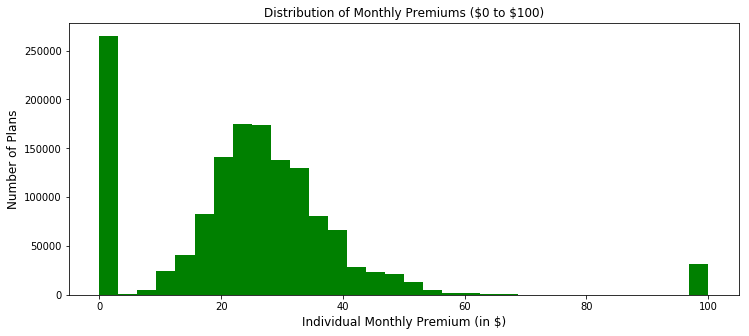

In [146]:
plt.figure(figsize=(12,5));
plt.hist(df[df['IndividualRate'] <= 100]['IndividualRate'], bins=32, color='g');
plt.title('Distribution of Monthly Premiums (\$0 to \$100)', fontsize=12)
plt.xlabel('Individual Monthly Premium (in $)', fontsize=12);
plt.ylabel('Number of Plans', fontsize=12);

It would also be interesting to see if plans types with a greater number of offered benefits have a positive correlation with monthly premium:

In [37]:
no_dupes['num_benefits'] = no_dupes.sum(1)

In [41]:
no_dupes['avg_rate'] = df.groupby('ben_key')['IndividualRate'].mean()

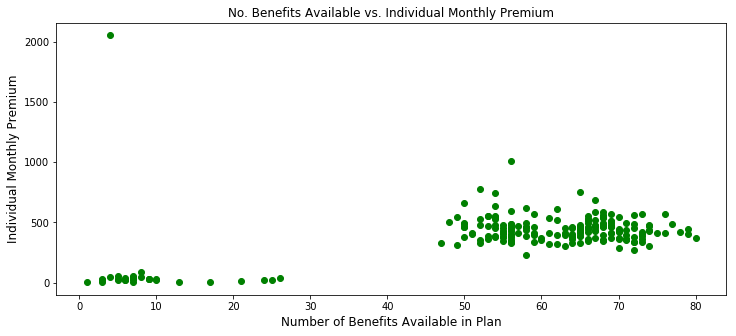

In [144]:
plt.figure(figsize=(12,5));

x = no_dupes['num_benefits']
y = no_dupes['avg_rate']

plt.scatter(x, y, color='g')
plt.title('No. Benefits Available vs. Individual Monthly Premium')
plt.xlabel('Number of Benefits Available in Plan', fontsize=12);
plt.ylabel('Individual Monthly Premium', fontsize=12);

There doesn't seem to be a linear relationship, but we can clearly see that the data are separated into two groups:

    a) Plans with between 0 and 30 benefits, which cost between $0-$100 per month
    b) Plans with between 45 and 80 benefits, which cost between $500-$1000 per month

## Monthly premium outliers

There is also one outlier at ~$2,000. Let's explore that plan.

In [88]:
         no_dupes[no_dupes['avg_rate'] > 2000].T.head(
).append(no_dupes[no_dupes['avg_rate'] > 2000].T.tail()
)

ben_key,26
"Dental Care, Basic - Child",1.000000
"Dental Care, Major - Child",1.000000
Orthodontia - Child,1.000000
"Dental, Accidental - Adult",1.000000
"Dental Care, Basic - Adult",0.000000
Post-cochlear implant aural therapy,0.000000
X-Rays and Exams - Adult,0.000000
"Dental Care, Minor - Adult",0.000000
num_benefits,4.000000
avg_rate,2052.764534


Looks like plan type '26' has four benefits associated with it -- namely:

    1. Dental Care, Basic - Child
    2. Dental Care, Major - Child
    3. Orthodontia - Child
    4. Dental, Accidental - Adult
    
It's clearly mis-priced. Let's take a look at the distribution of plan type '26':

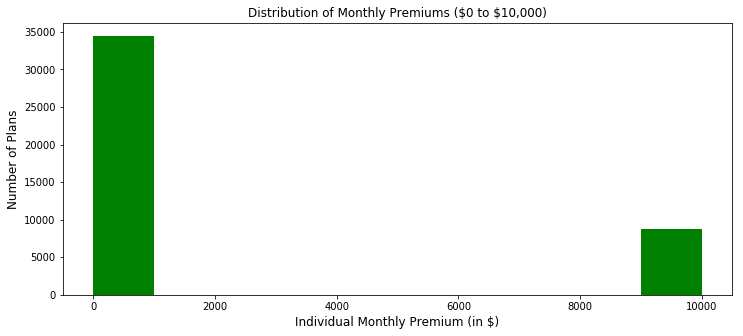

In [147]:
plt.figure(figsize=(12,5));
plt.hist(df[df['ben_key'] == 26]['IndividualRate'], color='g');
plt.title('Distribution of Monthly Premiums (\$0 to \$10,000)', fontsize=12)
plt.xlabel('Individual Monthly Premium (in $)', fontsize=12);
plt.ylabel('Number of Plans', fontsize=12);

There seem to be some plans priced between \$9,000 and \$10,000 per month! These must be incorrect given the benefits available in the plan. Let's filter that outlier out of our scatterplot and look at it again:

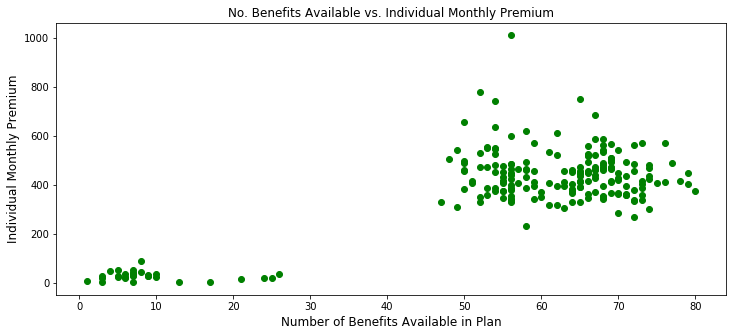

In [148]:
plt.figure(figsize=(12,5));

x = no_dupes[no_dupes['avg_rate'] < 2000]['num_benefits']
y = no_dupes[no_dupes['avg_rate'] < 2000]['avg_rate']

plt.scatter(x, y, color='g')
plt.title('No. Benefits Available vs. Individual Monthly Premium')
plt.xlabel('Number of Benefits Available in Plan', fontsize=12);
plt.ylabel('Individual Monthly Premium', fontsize=12);

## Distribution of benefits available

Let's also have a look at the histogram of plans by # of benefits available:

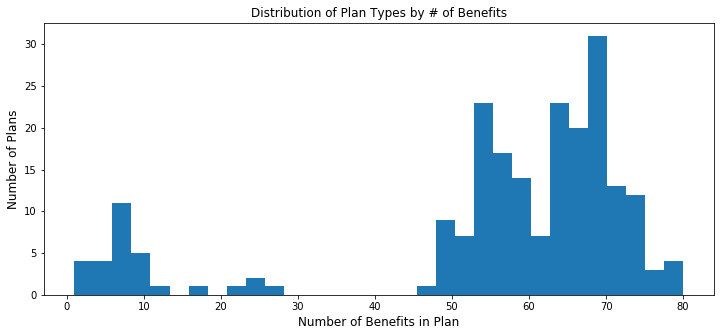

In [150]:
plt.figure(figsize=(12,5));
plt.hist(no_dupes[no_dupes['avg_rate'] < 2000]['num_benefits'], bins=32);
plt.title('Distribution of Plan Types by # of Benefits', fontsize=12)
plt.xlabel('Number of Benefits in Plan', fontsize=12);
plt.ylabel('Number of Plans', fontsize=12);

We can see three peaks, centered around:

    a) ~7-8 benefits
    b) ~55 benefits
    c) and ~65-70 benefits

## Distribution of monthly tobacco premiums

In [ ]:
{'bar', 'barstacked', 'step',  'stepfilled'}

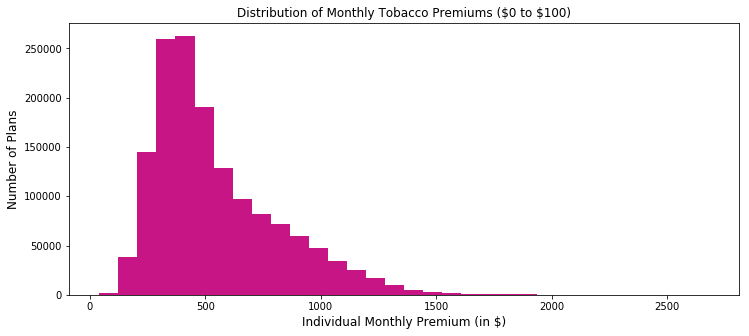

In [113]:
plt.figure(figsize=(12,5));
plt.hist(df['IndividualTobaccoRate'].dropna(), bins=32, color='mediumvioletred');
plt.title('Distribution of Monthly Tobacco Premiums (\$0 to \$100)', fontsize=12)
plt.xlabel('Individual Monthly Premium (in $)', fontsize=12);
plt.ylabel('Number of Plans', fontsize=12);

Premiums for tobacco smokers are centered around a mean that is higher than for non-tobacco smokers.

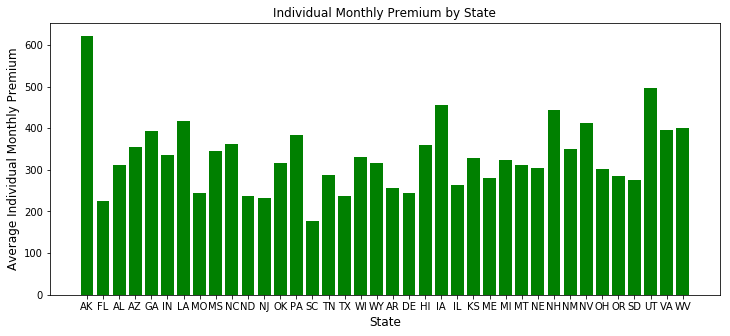

In [151]:
plt.figure(figsize=(12,5));

x = df['StateCode'].unique()
height = df.groupby('StateCode')['IndividualRate'].mean()

plt.bar(x=x, height=height, color='g')
plt.title('Individual Monthly Premium by State')
plt.xlabel('State', fontsize=12);
plt.ylabel('Average Individual Monthly Premium', fontsize=12);